In [1]:
import numpy as np
import pandas as pd

In [2]:
orders_df = pd.read_csv("orders.csv")

In [3]:
orders_df.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
products_df = pd.read_csv("products.csv", usecols=["product_id", "product_name"])

In [5]:
products_df.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [6]:
required_cols = usecols=["order_id", "product_id", "reordered"]
order_products_prior_df = pd.read_csv("order_products__prior.csv", usecols=required_cols)
order_products_train_df = pd.read_csv("order_products__train.csv", usecols=required_cols)

order_products_df = pd.concat([order_products_prior_df, order_products_train_df])

In [7]:
order_products_df.head()

,order_id,product_id,reordered
0,2,33120,1
1,2,28985,1
2,2,9327,0
3,2,45918,1
4,2,30035,0


In [8]:
order_products_df.shape

(33819106, 3)

In [9]:
full_orders_products_df = pd.merge(orders_df, order_products_df, on="order_id")

In [10]:
full_orders_products_df.shape

(33819106, 9)

In [11]:
full_orders_products_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
0,2539329,1,prior,1,2,8,NaN,196,0
1,2539329,1,prior,1,2,8,NaN,14084,0
2,2539329,1,prior,1,2,8,NaN,12427,0
3,2539329,1,prior,1,2,8,NaN,26088,0
4,2539329,1,prior,1,2,8,NaN,26405,0


In [12]:
# full_orders_full_products_df[full_orders_full_products_df['user_id'] == 81606].head()

In [13]:
orders_unique = full_orders_products_df[["user_id", "order_id", "days_since_prior_order"]].drop_duplicates()

In [14]:
orders_unique.head()

,user_id,order_id,days_since_prior_order
0,1,2539329,NaN
5,1,2398795,15.0
11,1,473747,21.0
16,1,2254736,29.0
21,1,431534,28.0


In [15]:
# tmp.groupby('user_id').sum('days_since_prior_order').count('order_id')
tmp2 = orders_unique.groupby('user_id', as_index=False).agg({'order_id': ['count'], 'days_since_prior_order': ['sum']})
tmp2.columns = ['user_id', 'orders_amount', 'days_since_prior_order_total']

In [16]:
tmp2.head()

,user_id,orders_amount,days_since_prior_order_total
0,1,11,190.0
1,2,15,228.0
2,3,12,133.0
3,4,5,55.0
4,5,5,46.0


In [17]:
tmp2['user_id'].count()

206209

In [18]:
tmp3 = tmp2.groupby('days_since_prior_order_total', as_index=False).agg({'user_id': 'count'})
tmp3.columns = ['days_since_prior_order_total', 'users_count']

In [19]:
tmp3.head()

,days_since_prior_order_total,users_count
0,0.0,14
1,1.0,16
2,2.0,22
3,3.0,34
4,4.0,43


In [20]:
import matplotlib.pyplot as plt

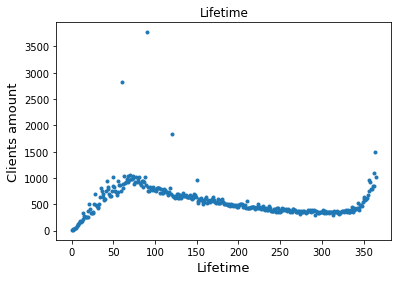

In [21]:
plt.plot(tmp3['days_since_prior_order_total'].values, tmp3['users_count'].values, '.')
plt.xlabel('Lifetime', fontsize=13)
plt.ylabel('Clients amount', fontsize=13)
plt.title('Lifetime')
plt.show()

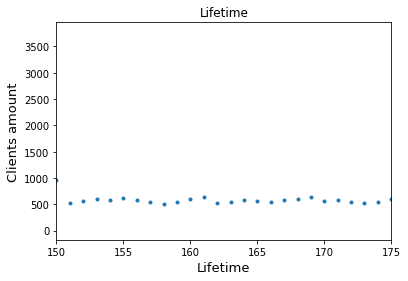

In [30]:
plt.plot(tmp3['days_since_prior_order_total'].values, tmp3['users_count'].values, '.')
plt.xlabel('Lifetime', fontsize=13)
plt.ylabel('Clients amount', fontsize=13)
plt.title('Lifetime')
plt.xlim([150, 175])
plt.show()

In [23]:
# tmp2 = orders_unique.groupby('user_id', as_index=False).agg({'order_id': ['count'], 'days_since_prior_order': ['sum']})
# tmp2.columns = ['user_id', 'orders_amount', 'days_since_prior_order_total']

user_avarage_day = orders_unique.groupby('user_id', as_index=False).agg({'days_since_prior_order': ['mean']})
user_avarage_day.columns = ['user_id', 'avg_latency']
user_avarage_day_rounded = user_avarage_day.copy()

user_avarage_day.avg_latency = user_avarage_day.avg_latency.astype(int)
user_avarage_day_rounded.avg_latency = user_avarage_day_rounded.avg_latency.round(1)

In [24]:
user_avarage_day.head()

,user_id,avg_latency
0,1,19
1,2,16
2,3,12
3,4,13
4,5,11


In [25]:
# amount of users with the same avg_latency
tmp4 = user_avarage_day.groupby('avg_latency', as_index=False).agg({'user_id': 'count'})
tmp4.columns = ['avg_latency', 'amount_users']

tmp4_rounded = user_avarage_day_rounded.groupby('avg_latency', as_index=False).agg({'user_id': 'count'})
tmp4_rounded.columns = ['avg_latency', 'amount_users']

Text(0.5, 1.0, 'Rounded to integer')

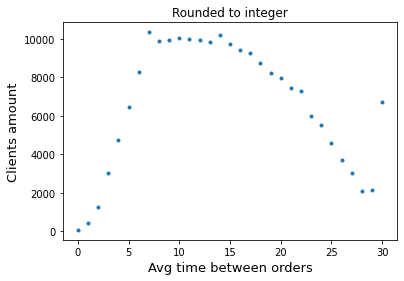

In [26]:
plt.plot(tmp4['avg_latency'].values, tmp4['amount_users'].values, '.')
plt.xlabel('Avg time between orders', fontsize=13)
plt.ylabel('Clients amount', fontsize=13)
plt.title('Rounded to integer')

Text(0.5, 1.0, 'Rounded to .0')

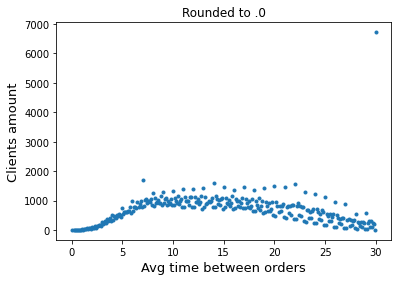

In [27]:
plt.plot(tmp4_rounded['avg_latency'].values, tmp4_rounded['amount_users'].values, '.')
plt.xlabel('Avg time between orders', fontsize=13)
plt.ylabel('Clients amount', fontsize=13)
plt.title('Rounded to .0')